In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv("/content/Parkinsson disease.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.shape

(195, 24)

In [ ]:
df.size

4680

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()
df['name'] = label_encoder.fit_transform(df['name'])
print(df['name'].head())

0    0
1    1
2    2
3    3
4    4
Name: name, dtype: int64


In [ ]:
df.columns = df.columns.str.replace(' ', '_').str.replace(':', '_').str.replace('(', '').str.replace(')', '').str.lower()
df.columns

Index(['name', 'mdvp_fohz', 'mdvp_fhihz', 'mdvp_flohz', 'mdvp_jitter%',
       'mdvp_jitterabs', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp', 'mdvp_shimmer',
       'mdvp_shimmerdb', 'shimmer_apq3', 'shimmer_apq5', 'mdvp_apq',
       'shimmer_dda', 'nhr', 'hnr', 'status', 'rpde', 'dfa', 'spread1',
       'spread2', 'd2', 'ppe'],
      dtype='object')

In [ ]:
df['mdvp_fohz'].fillna(df['mdvp_fohz'].mean(), inplace=True)
df['mdvp_fhihz'].fillna(df['mdvp_fhihz'].mean(), inplace=True)
df['mdvp_flohz'].fillna(df['mdvp_flohz'].mean(), inplace=True)
df['mdvp_jitter%'].fillna(df['mdvp_jitter%'].mean(), inplace=True)
df['mdvp_jitterabs'].fillna(df['mdvp_jitterabs'].mean(), inplace=True)
df['mdvp_ppq'].fillna(df['mdvp_ppq'].mean(), inplace=True)
df['mdvp_rap'].fillna(df['mdvp_rap'].mean(), inplace=True)
df['jitter_ddp'].fillna(df['jitter_ddp'].mean(), inplace=True)
df['mdvp_shimmer'].fillna(df['mdvp_shimmer'].mean(), inplace=True)
df['mdvp_shimmerdb'].fillna(df['mdvp_shimmerdb'].mean(), inplace=True)
df['shimmer_apq3'].fillna(df['shimmer_apq3'].mean(), inplace=True)
df['shimmer_apq5'].fillna(df['shimmer_apq5'].mean(), inplace=True)
df['mdvp_apq'].fillna(df['mdvp_apq'].mean(), inplace=True)
df['shimmer_dda'].fillna(df['shimmer_dda'].mean(), inplace=True)
df['nhr'].fillna(df['nhr'].mean(), inplace=True)
df['hnr'].fillna(df['hnr'].mean(), inplace=True)
df['rpde'].fillna(df['rpde'].mean(), inplace=True)
df['dfa'].fillna(df['dfa'].mean(), inplace=True)
df['ppe'].fillna(df['ppe'].mean(), inplace=True)


<ipython-input-83-d06e2738df28>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mdvp_fohz'].fillna(df['mdvp_fohz'].mean(), inplace=True)
<ipython-input-83-d06e2738df28>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
df.isnull().sum()

,0
name,0
mdvp_fohz,0
mdvp_fhihz,0
mdvp_flohz,0
mdvp_jitter%,0
mdvp_jitterabs,0
mdvp_rap,0
mdvp_ppq,0
jitter_ddp,0
mdvp_shimmer,0


In [ ]:
df.head()

,name,mdvp_fohz,mdvp_fhihz,mdvp_flohz,mdvp_jitter%,mdvp_jitterabs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
X = df.drop('status', axis=1)
y = df['status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [ ]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[ 7  0]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        32

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-93-dbeb1234e3b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='status', data=df, palette='coolwarm')


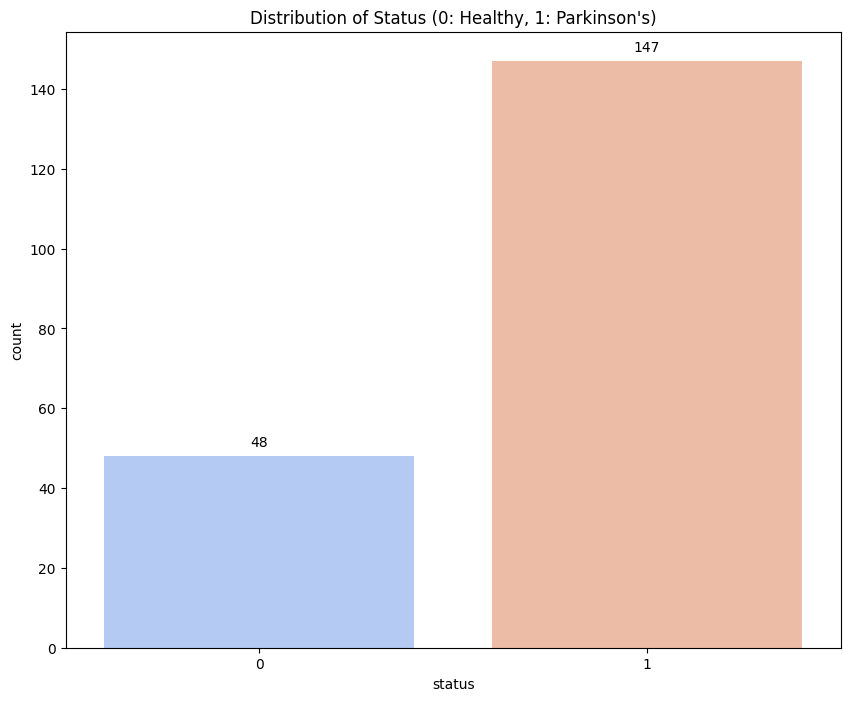

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='status', data=df, palette='coolwarm')
plt.title("Distribution of Status (0: Healthy, 1: Parkinson's)")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


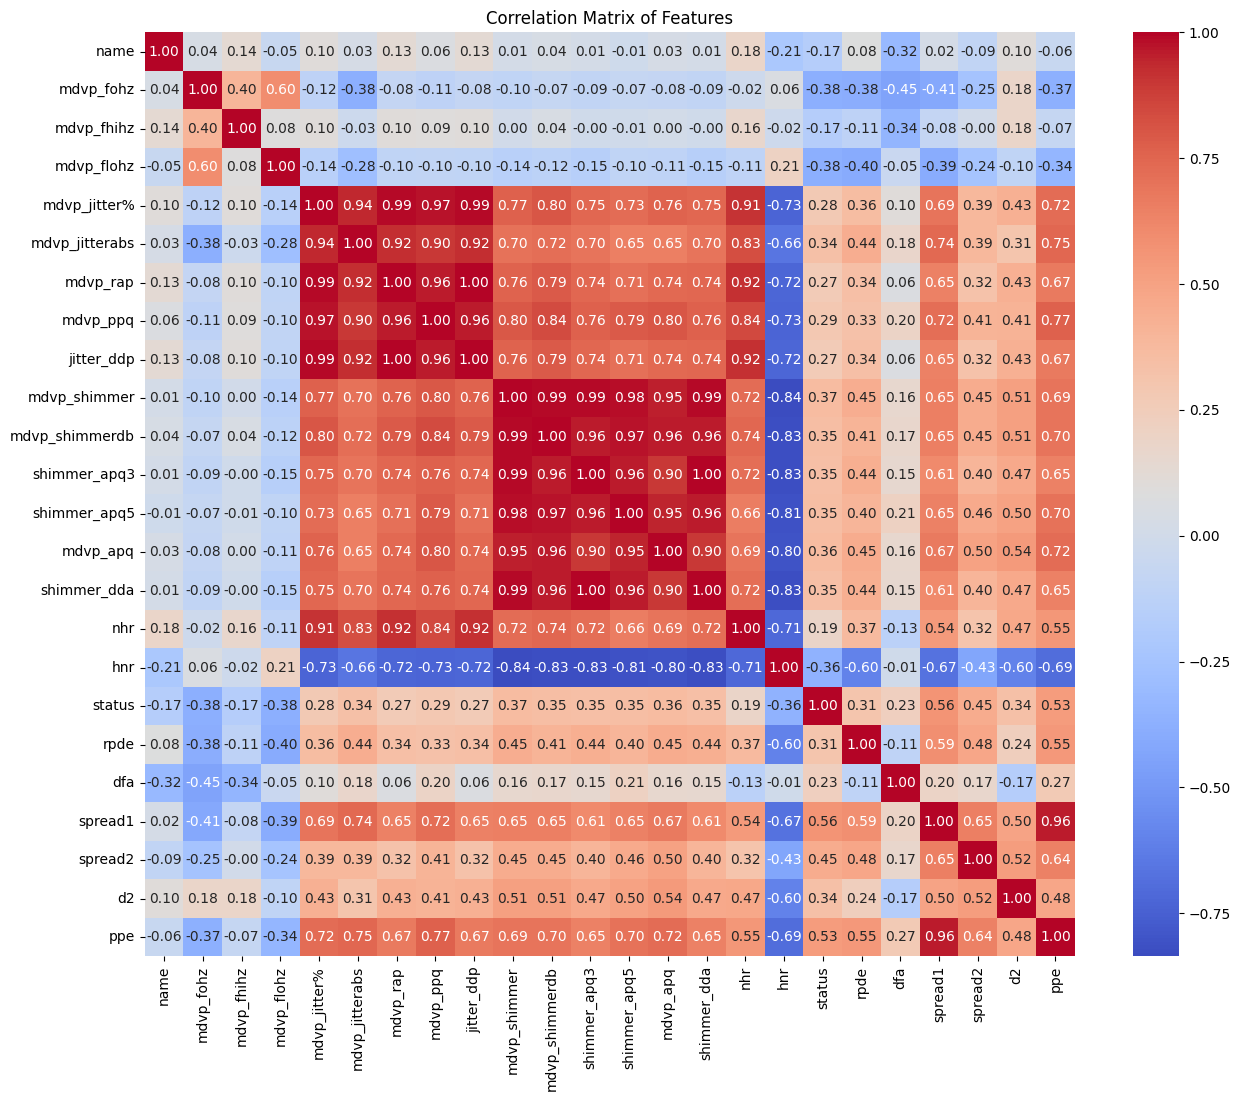

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

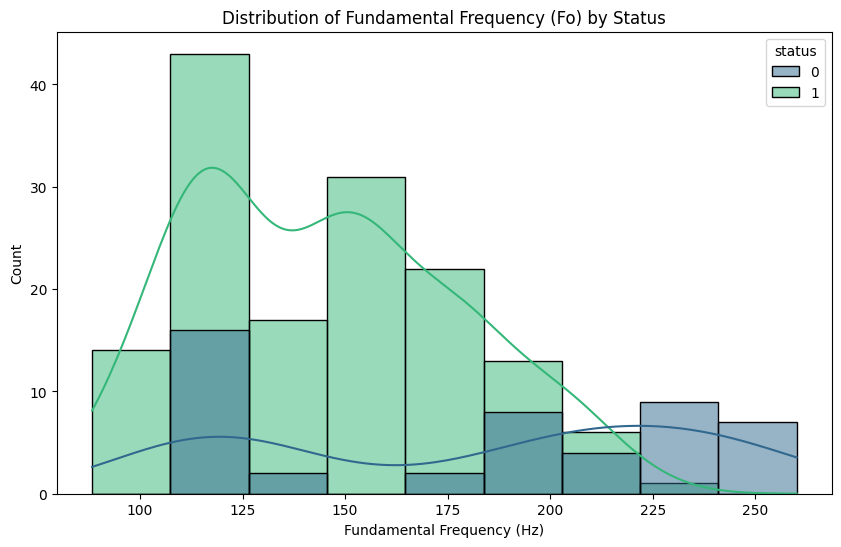

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='mdvp_fohz', hue='status', kde=True, palette='viridis')
plt.title('Distribution of Fundamental Frequency (Fo) by Status')
plt.xlabel('Fundamental Frequency (Hz)')
plt.ylabel('Count')
plt.show()


<ipython-input-96-e8fe4c751cee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette='Spectral')


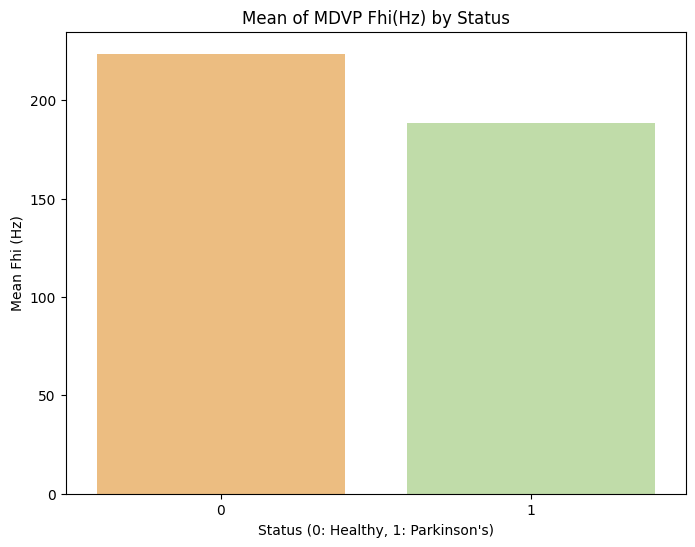

In [ ]:
plt.figure(figsize=(8, 6))
mean_values = df.groupby('status')['mdvp_fhihz'].mean()
sns.barplot(x=mean_values.index, y=mean_values.values, palette='Spectral')
plt.title('Mean of MDVP Fhi(Hz) by Status')
plt.xlabel('Status (0: Healthy, 1: Parkinson\'s)')
plt.ylabel('Mean Fhi (Hz)')
plt.show()